# Imports

In [10]:
import pandas as pd
import numpy as np

# Charger, observer et comprendre le dataset

In [11]:
file = pd.read_csv("credit.csv").drop(columns=["Loan_ID"])

print(file)
print(file.describe())
print(file.isna().sum())

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# Transformer les données catégorielles en données numériques

# Afficher et traiter les données manquantes
Pour traiter les données manquantes, regarder `SimpleImputer` ou `KNNImputer`

In [12]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
for i in [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Property_Area",
]:
    file[i] = enc.fit_transform(file[[i]])

print(file)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        0.0            0.0             5849   
1       1.0      1.0         1.0        0.0            0.0             4583   
2       1.0      1.0         0.0        0.0            1.0             3000   
3       1.0      1.0         0.0        1.0            0.0             2583   
4       1.0      0.0         0.0        0.0            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        0.0            0.0             2900   
610     1.0      1.0         3.0        0.0            0.0             4106   
611     1.0      1.0         1.0        0.0            0.0             8072   
612     1.0      1.0         2.0        0.0            0.0             7583   
613     0.0      0.0         0.0        0.0            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

for i in file.iloc[:, :-1].columns:
    file[i] = imputer.fit_transform(file[[i]])

print(file)
print(file.isna().sum())

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        0.0            0.0           5849.0   
1       1.0      1.0         1.0        0.0            0.0           4583.0   
2       1.0      1.0         0.0        0.0            1.0           3000.0   
3       1.0      1.0         0.0        1.0            0.0           2583.0   
4       1.0      0.0         0.0        0.0            0.0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        0.0            0.0           2900.0   
610     1.0      1.0         3.0        0.0            0.0           4106.0   
611     1.0      1.0         1.0        0.0            0.0           8072.0   
612     1.0      1.0         2.0        0.0            0.0           7583.0   
613     0.0      0.0         0.0        0.0            1.0           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# Standardiser les données

In [14]:
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()
for i in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]:
    file[i] = sts.fit_transform(file[[i]])

print(file)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        0.0            0.0         0.072991   
1       1.0      1.0         1.0        0.0            0.0        -0.134412   
2       1.0      1.0         0.0        0.0            1.0        -0.393747   
3       1.0      1.0         0.0        1.0            0.0        -0.462062   
4       1.0      0.0         0.0        0.0            0.0         0.097728   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        0.0            0.0        -0.410130   
610     1.0      1.0         3.0        0.0            0.0        -0.212557   
611     1.0      1.0         1.0        0.0            0.0         0.437174   
612     1.0      1.0         2.0        0.0            0.0         0.357064   
613     0.0      0.0         0.0        0.0            1.0        -0.134412   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# Séparer le dataset en train et test

In [15]:
from sklearn.model_selection import train_test_split

X = file.iloc[:, :-1]
y = file.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Régression logistique
Entrainer une régression logistique avec les hyper-paramètres par défaut

0.8044806517311609
0.8373983739837398


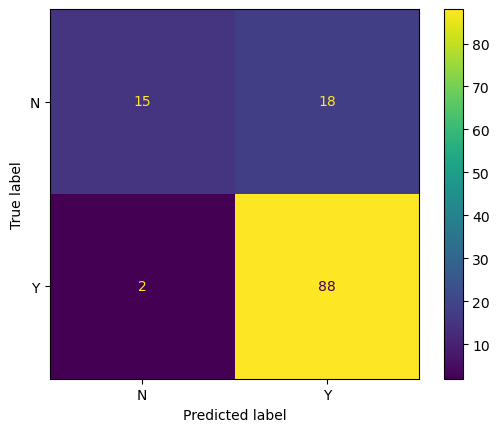

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



logreg = LogisticRegression(random_state=0)



logreg.fit(X_train, y_train)



print(logreg.score(X_train, y_train))



print(logreg.score(X_test, y_test))


display = ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

# KNN
Entrainer un KNN avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les paramètres suivants:
- k : 3, 5, 7, 9, 11,
- poids : uniform, distance,
- distances : euclidean, manhattan, minkowski

Original train accuracy: 0.8024439918533605
Original test accuracy:  0.7886178861788617

GridSearch
Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Optimized train accuracy: 1.0
Optimized test accuracy:  0.7560975609756098

RandomizedSearch
Best parameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'minkowski'}
Optimized train accuracy: 1.0
Optimized test accuracy:  0.7804878048780488


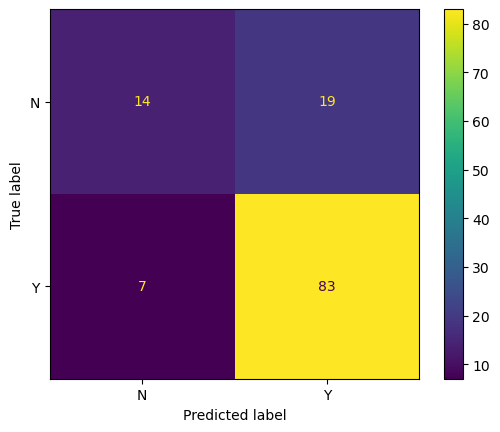

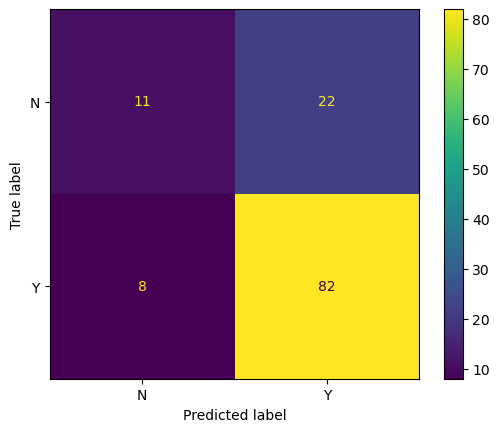

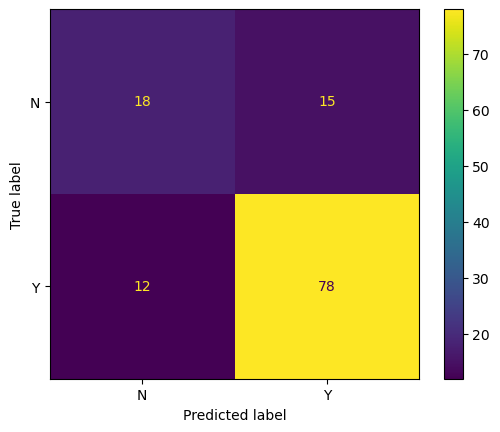

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


def optimize_model(model, X_train, y_train, param_grid, param_distributions):
    model.fit(X_train, y_train)

    print(
        f"Original train accuracy: {model.score(X_train, y_train)}\nOriginal test accuracy:  {model.score(X_test, y_test)}"
    )

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring="accuracy",
        n_jobs=-1,
        cv=5,
    )
    grid_search.fit(X_train, y_train)

    print(f"\nGridSearch\nBest parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    print(
        f"Optimized train accuracy: {best_model.score(X_train, y_train)}\nOptimized test accuracy:  {best_model.score(X_test, y_test)}"
    )

    display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        scoring="accuracy",
        n_jobs=-1,
        cv=5,
        random_state=0,
    )
    randomized_search.fit(X_train, y_train)

    print(f"\nRandomizedSearch\nBest parameters: {randomized_search.best_params_}")
    best_model = randomized_search.best_estimator_

    print(
        f"Optimized train accuracy: {best_model.score(X_train, y_train)}\nOptimized test accuracy:  {best_model.score(X_test, y_test)}"
    )

    display = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

param_distributions = {
    "n_neighbors": [int(x) for x in np.linspace(start=1, stop=20)],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

optimize_model(
    KNeighborsClassifier(), X_train, y_train, param_grid, param_distributions
)

# SVM
Entrainer un SVM avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les paramètres suivants:
- C : 0.01, 0.1, 1, 10, 100,
- noyau : linear, poly, rbf, sigmoid,
- gamma : scale, auto, 0.001, 0.01, 0.1, 1,
- degrée du polynome : 2, 3, 4, 5

Original train accuracy: 0.8187372708757638
Original test accuracy:  0.8373983739837398

GridSearch
Best parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Optimized train accuracy: 0.8044806517311609
Optimized test accuracy:  0.8292682926829268

RandomizedSearch
Best parameters: {'kernel': 'linear', 'gamma': 0.7142857142857142, 'degree': 3, 'C': 89.79591836734694}
Optimized train accuracy: 0.8044806517311609
Optimized test accuracy:  0.8292682926829268


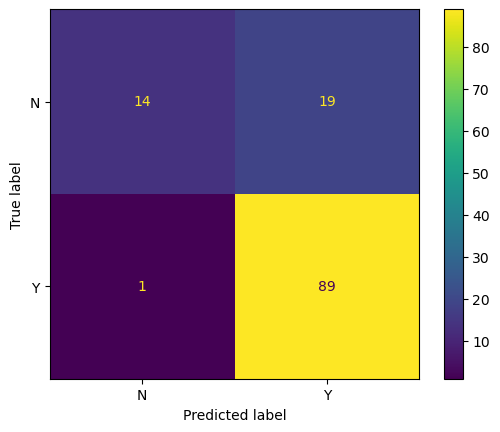

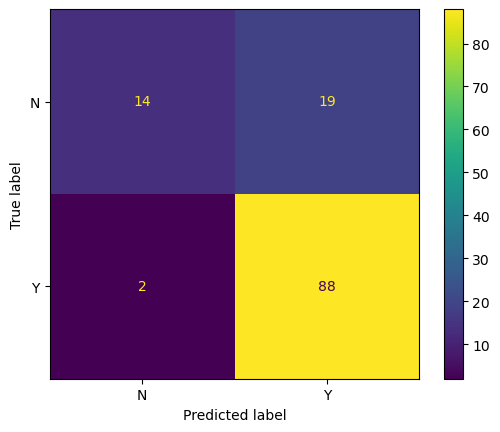

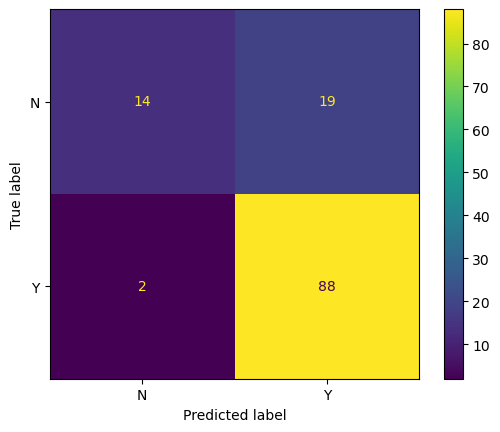

In [31]:
from sklearn.svm import SVC

param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],
    "degree": [2, 3, 4, 5],
}

param_distributions = {
    "C": [x for x in np.linspace(start=0, stop=100)],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": [x for x in np.linspace(start=0, stop=1)] + ["scale", "auto"],
    "degree": [int(x) for x in np.linspace(start=0, stop=10)],
}

optimize_model(SVC(), X_train, y_train, param_grid, param_distributions)

# DecisionTree
Entrainer un arbre de décision avec les hyper-paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les hyper-paramètres suivants:
- critère : gini, entropy,
- profondeur maximale : None, 10, 20, 30, 40, 50,
- nombre minimum d'exemples par split : 2, 5, 10, 20,
- nombre minimum d'exemples par feuille : 1, 2, 4, 6,
- nombre de features maximum : None, sqrt, log2

Original train accuracy: 1.0
Original test accuracy:  0.6747967479674797

GridSearch
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 10}
Optimized train accuracy: 0.8044806517311609
Optimized test accuracy:  0.7154471544715447

RandomizedSearch
Best parameters: {'min_samples_split': 15, 'min_samples_leaf': 46, 'max_features': None, 'max_depth': 38, 'criterion': 'gini'}
Optimized train accuracy: 0.8044806517311609
Optimized test accuracy:  0.8292682926829268


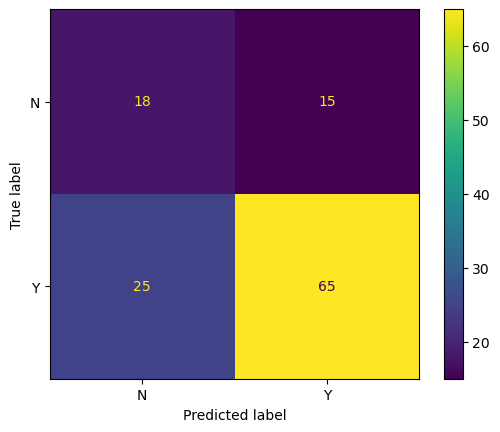

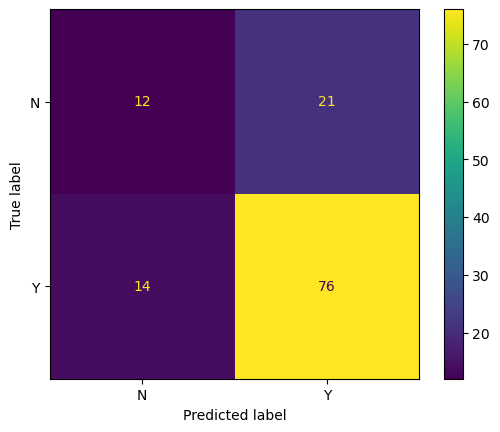

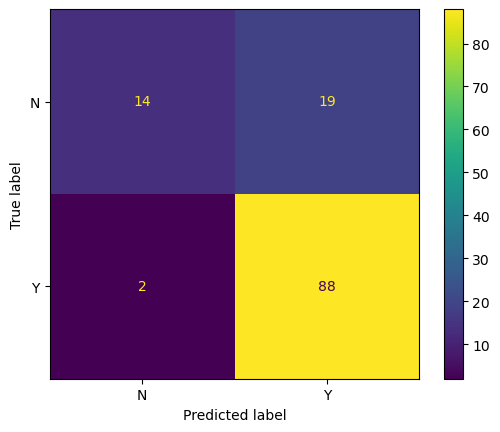

In [32]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": [None, "sqrt", "log2"],
}

param_distributions = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None] + [int(x) for x in np.linspace(start=0, stop=100)],
    "min_samples_split": [int(x) for x in np.linspace(start=0, stop=50)],
    "min_samples_leaf": [int(x) for x in np.linspace(start=0, stop=50)],
    "max_features": [None, "sqrt", "log2"],
}

optimize_model(
    DecisionTreeClassifier(), X_train, y_train, param_grid, param_distributions
)

# RandomForest
Entrainer une forêt aléatoire avec les paramètres par défaut
Avec `GridSearchCV` ou `RandomizedSearchCV`, optimiser les hyper-paramètres. Utiliser une validation croisée de 5 splits. Vous explorerez les hyper-paramètres suivants:
- nombre d'arbres : 50, 100, 200, 300,
- critère : gini, entropy,
- profondeur maximale : None, 10, 20, 30, 40, 50,
- nombre minimum d'exemples par split : 2, 5, 10, 20,
- nombre minimum d'exemples par feuille : 1, 2, 4, 6,
- nombre de features maximum : None, sqrt, log2,
- remise des exemples : vrai, faux

In [20]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False],
}

param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start=0, stop=500)],
    "criterion": ["gini", "entropy"],
    "max_depth": [None] + [int(x) for x in np.linspace(start=0, stop=100)],
    "min_samples_split": [int(x) for x in np.linspace(start=0, stop=50)],
    "min_samples_leaf": [int(x) for x in np.linspace(start=0, stop=50)],
    "max_features": [None, "sqrt", "log2"],
    "bootstrap": [True, False],
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    scoring="accuracy",
    n_jobs=-1,
    cv=5,
    random_state=0,
)
randomized_search.fit(X_train, y_train)

print(f"\nRandomizedSearch\nBest parameters: {randomized_search.best_params_}")
best_model = randomized_search.best_estimator_

print(
    f"Optimized train accuracy: {best_model.score(X_train, y_train)}\nOptimized test accuracy:  {best_model.score(X_test, y_test)}"
)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages\sk


RandomizedSearch
Best parameters: {'n_estimators': 479, 'min_samples_split': 46, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 79, 'criterion': 'gini', 'bootstrap': True}
Optimized train accuracy: 0.8044806517311609
Optimized test accuracy:  0.8292682926829268


# Rapporter et analyser les résultats obtenir. Choisir le meilleur modèle

# Analyser le meilleur modèle
En utilisant `classification_report`, afficher différentes métriques en train et en test du modèle choisit. Afficher la matrice de confusion en train et en test de ce même modèle. Qu'en concluez-vous sur la qualité de ce modèle?

# A faire à la maison : Développer un notebook similaire pour une tâche de régression